In [86]:
#improting necessary libraries

import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [87]:
# Load CSV file into DataFrame

data  = pd.read_csv('./dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
# Get DataFrame's dimensions (rows, columns).

data.shape

(768, 9)

In [104]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


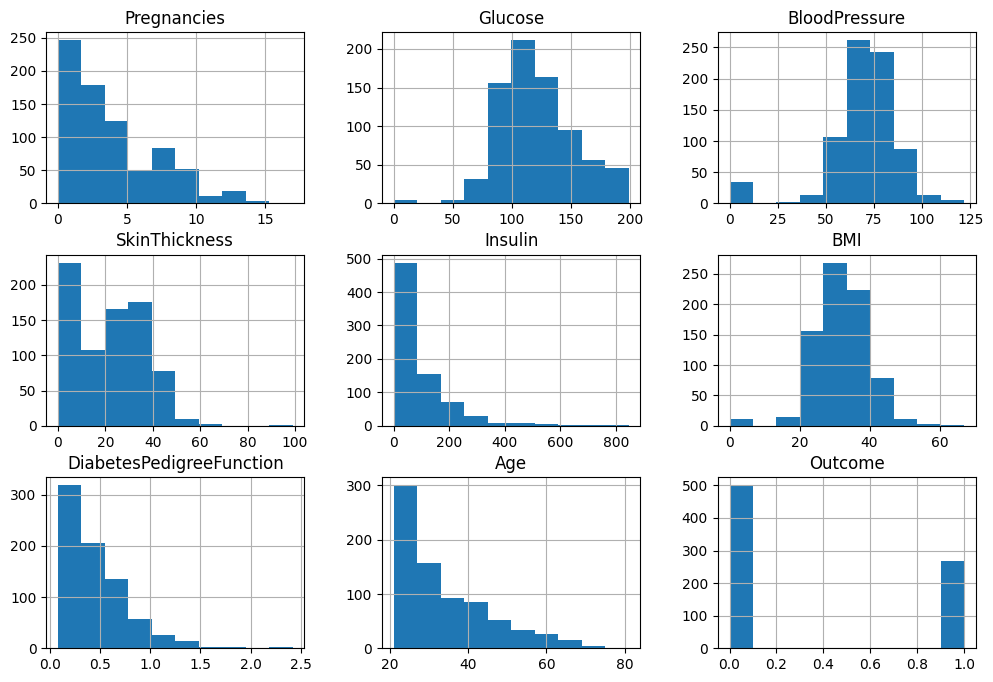

In [90]:
data.hist(figsize=(12, 8))

plt.show()

In [91]:
#used to count the number of missing values (NaNs) in each column of a DataFrame data

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [92]:
#used to count the number of duplicated rows in a DataFrame data

data.duplicated().sum()

0

In [93]:
# remove duplicate rows from the DataFrame data

data = data.drop_duplicates()

In [94]:
data.shape

(768, 9)

In [95]:
from keras.layers import Dense , Activation ,Flatten , Conv2D , MaxPooling2D
from keras import Sequential

In [98]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [99]:

# extract features and targets
X = data.drop(columns=['Outcome'])
Y = data['Outcome']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


In [100]:
#creates a new DataFrame x by dropping the column named 'Outcome' from the DataFrame data

x = data.drop(columns='Outcome', axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [101]:
#creates a new Series y containing the values from the 'Outcome' column of the DataFrame data

y = data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [69]:
#return a count of unique values in the 'Outcome' column of the DataFrame data

data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [102]:
#computes pairwise correlation of columns, excluding NA/null values. 

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

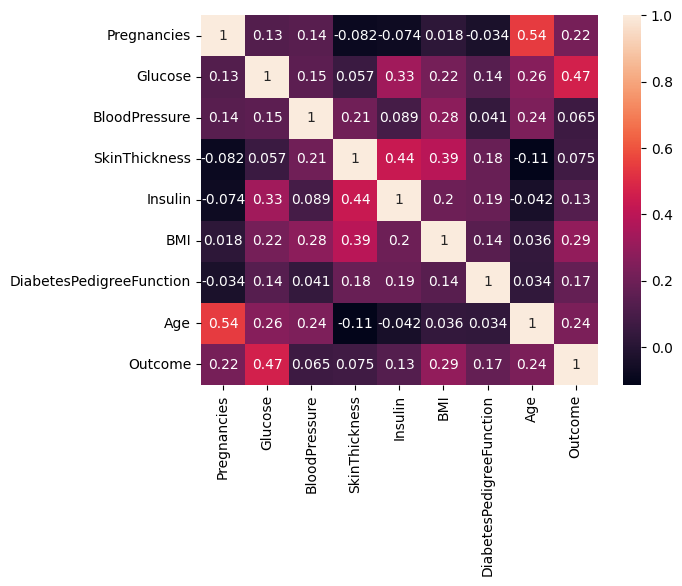

In [149]:
#create a heatmap of the correlation matrix corr with annotations.

corr = data.corr()
sns.heatmap(corr,annot=True)

In [107]:
#groups the DataFrame data by the 'Outcome' column and then calculates the mean value for each column for each group.

data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [109]:
x = data.drop(columns='Outcome', axis = 1)
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [110]:
y = data['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [116]:

from sklearn.preprocessing import StandardScaler


In [117]:
#created an instance of the StandardScaler class from the sklearn.preprocessing module. 

scalar = StandardScaler()

In [118]:
scalar.fit(x)

StandardScaler()

In [119]:
# transform the data in x to a standardized form.

standardized_data = scalar.transform(x)


In [120]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [121]:
x=standardized_data
y = data['Outcome']

In [123]:
print(x)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [124]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


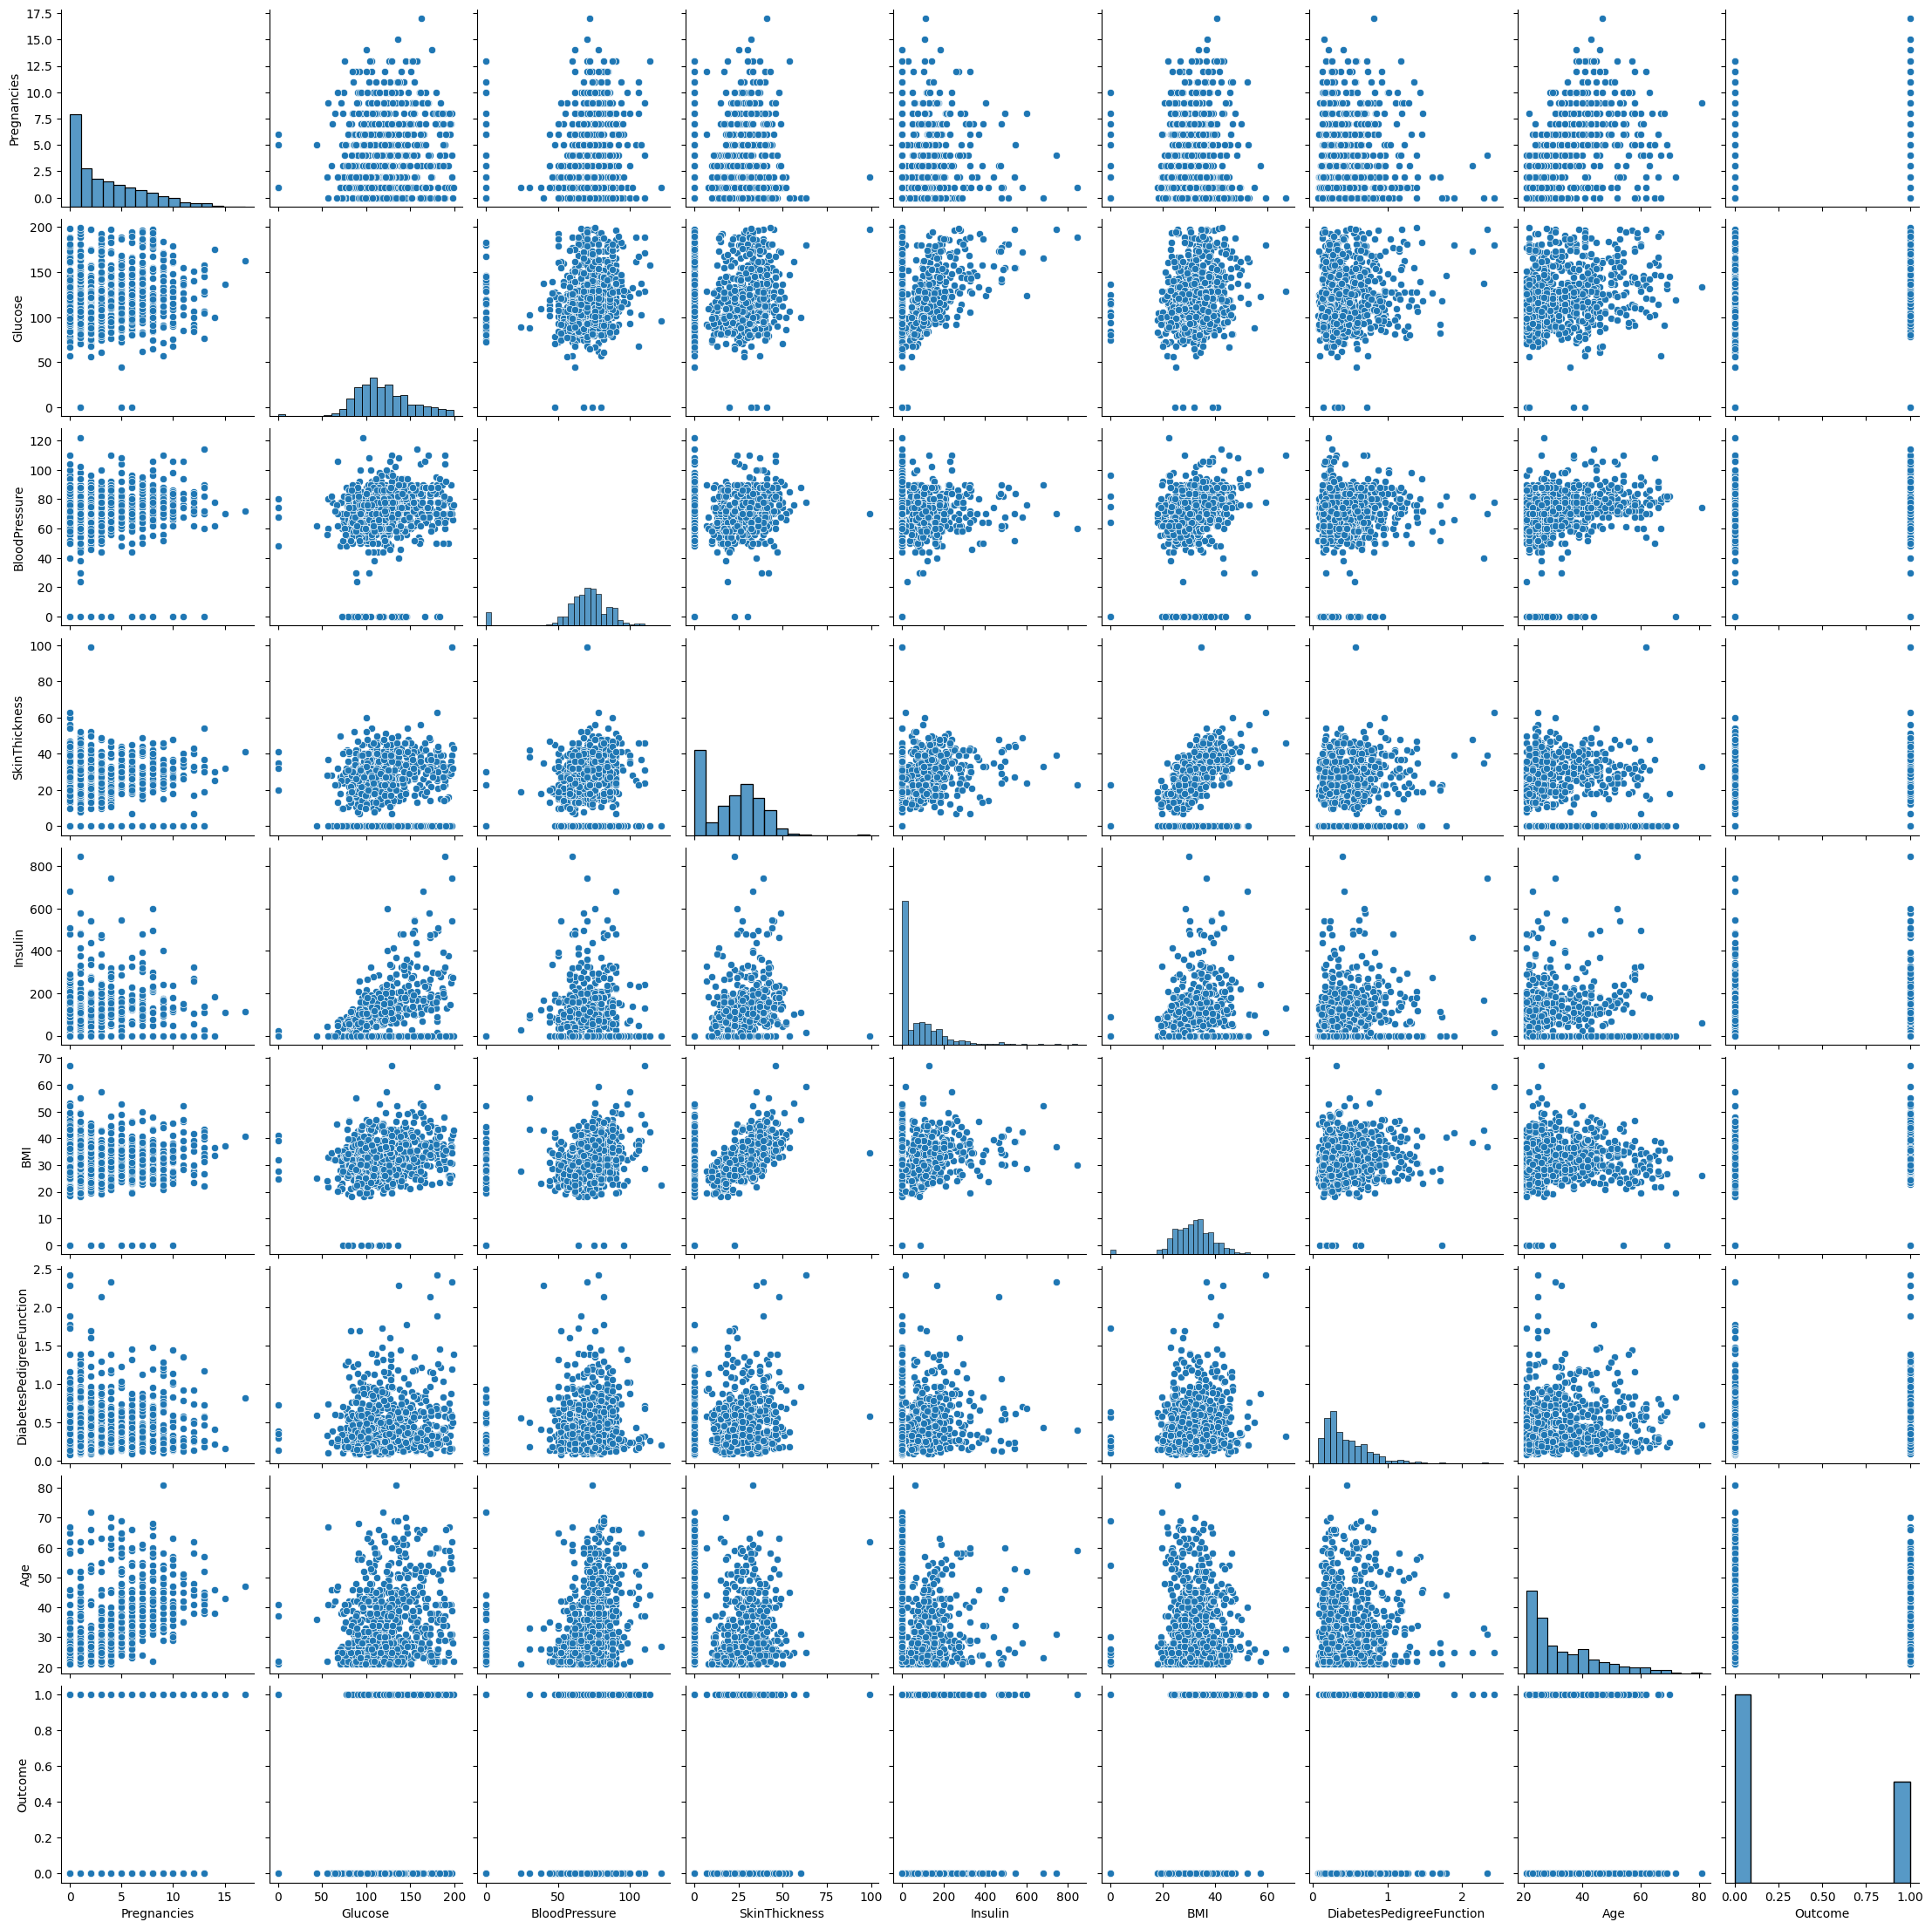

In [126]:
#create a grid of pairwise plots of the variables in the DataFrame data

sns.pairplot(data)

In [190]:
#used to split arrays or matrices into random train and test subsets.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [191]:
X_train.shape


(537, 8)

In [192]:
Y_train.shape

(537,)

In [193]:
X_test.shape

(231, 8)

In [194]:
Y_test.shape

(231,)

In [195]:
#uses a Logistic Regression classifier from scikit-learn to classify the data.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [196]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [199]:
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7575757575757576


In [200]:
from sklearn import metrics
import numpy

In [201]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

In [202]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

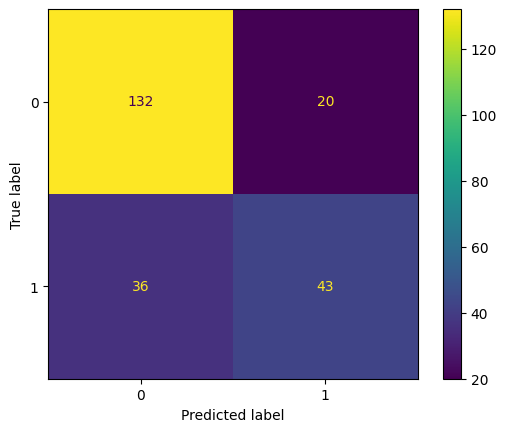

In [203]:
cm_display.plot()
plt.show()

In [204]:
# uses a Support Vector Machine (SVM) classifier from scikit-learn to classify the data.

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.7445887445887446


In [234]:
from tensorflow.keras.utils import to_categorical
classes = len(np.unique(Y_train))
train_y = to_categorical(Y_train, classes)
test_y = to_categorical(Y_test, classes)

In [235]:
scaler = StandardScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

In [343]:
#  creates a sequential model, where layers are added sequentially.

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [344]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,378 (427.26 KB)

 Trainable params: 109,378 (427.26 KB)

 Non-trainable params: 0 (0.00 B)

In [345]:
Input = tf.keras.layers.Input

In [346]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer="adam",metrics=['accuracy']) #configure the learning process of the model.

In [358]:
model.fit(X_train,Y_train,epochs=200,validation_split=0.3)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.6481 - val_loss: 2.7242
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.6728 - val_loss: 2.8052
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0110 - val_accuracy: 0.6543 - val_loss: 2.8372
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.6543 - val_loss: 2.8780
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.6605 - val_loss: 2.9004
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6667 - val_loss: 2.9249
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.6728 - val_loss: 2.9508
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6728 - v

In [359]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f'Training Accuracy: {train_accuracy }')
print(f'Test Accuracy: {test_accuracy }')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9750 - loss: 0.3762   
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6841 - loss: 5.1492
Training Accuracy: 0.9031657576560974
Test Accuracy: 0.6623376607894897


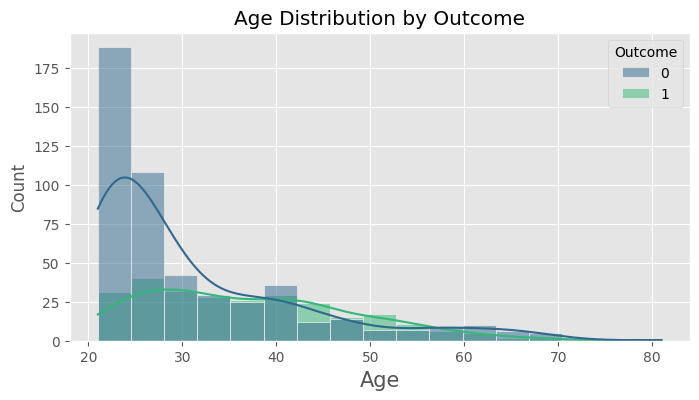

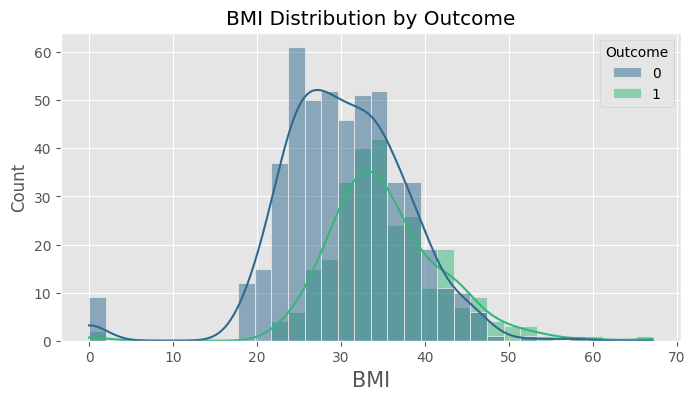

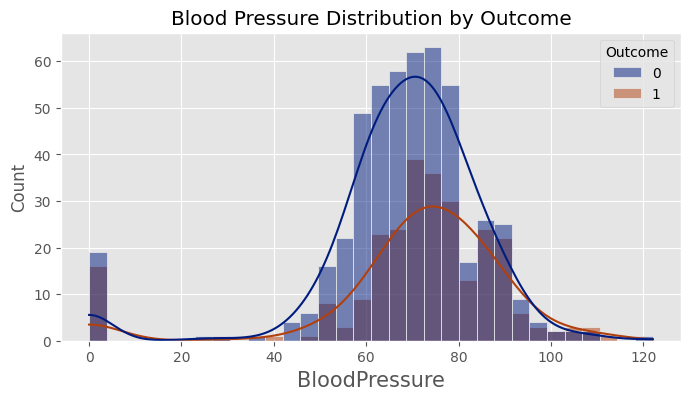

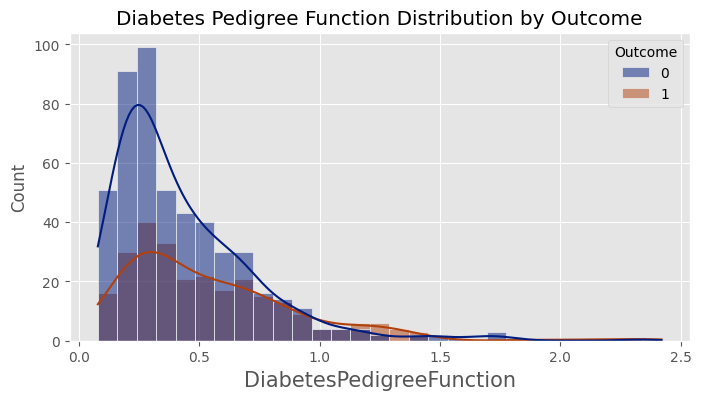

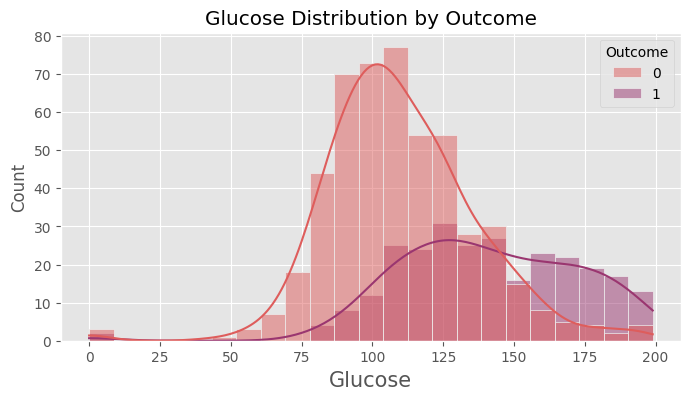

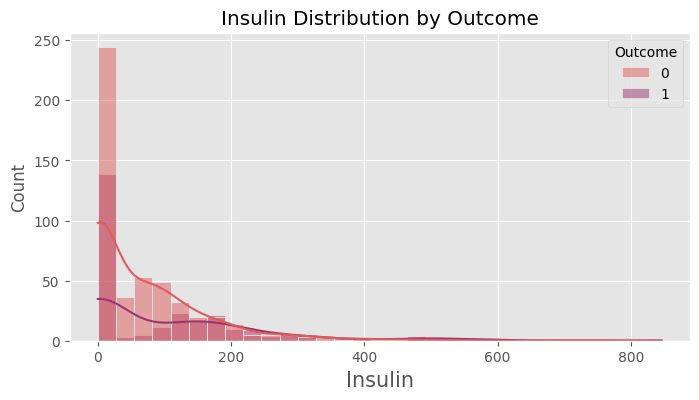

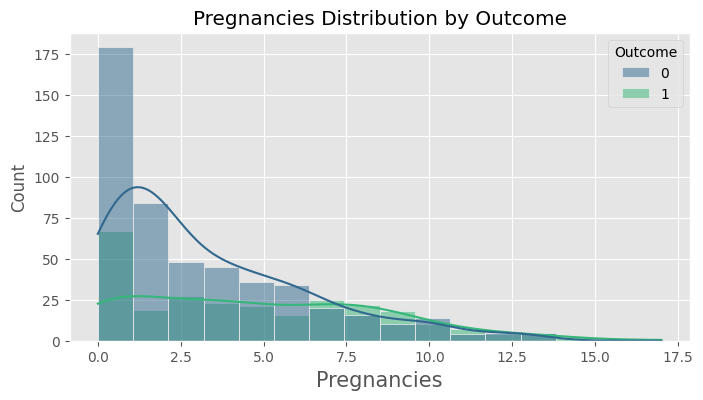

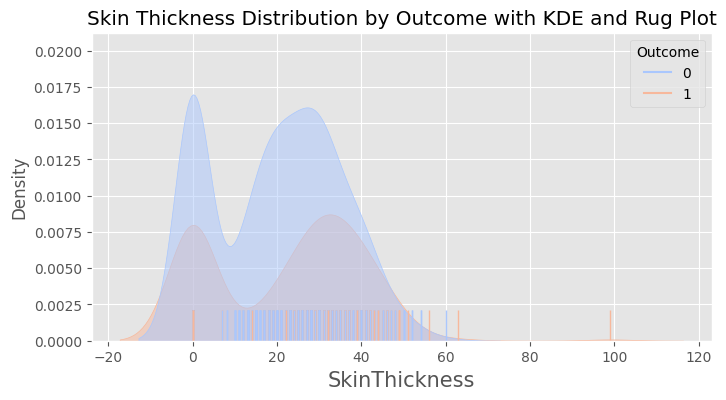

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Plot for Age
plt.figure(figsize=(8, 4))
sns.histplot(x=data['Age'], hue=data['Outcome'], palette="viridis", kde=True)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution by Outcome')
plt.show()

# Plot for BMI
plt.figure(figsize=(8, 4))
sns.histplot(x=data['BMI'], hue=data['Outcome'], palette="viridis", kde=True)
plt.xlabel('BMI', fontsize=15)
plt.title('BMI Distribution by Outcome')
plt.show()

# Plot for BloodPressure
plt.figure(figsize=(8, 4))
sns.histplot(x=data['BloodPressure'], hue=data['Outcome'], palette="dark", kde=True)
plt.xlabel('BloodPressure', fontsize=15)
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

# Plot for DiabetesPedigreeFunction
plt.figure(figsize=(8,4))
sns.histplot(x=data['DiabetesPedigreeFunction'], hue=data['Outcome'], palette="dark", kde=True)
plt.xlabel('DiabetesPedigreeFunction', fontsize=15)
plt.title('Diabetes Pedigree Function Distribution by Outcome')
plt.show()

# Plot for Glucose
plt.figure(figsize=(8,4))
sns.histplot(x=data['Glucose'], hue=data['Outcome'], palette="flare", kde=True)
plt.xlabel('Glucose', fontsize=15)
plt.title('Glucose Distribution by Outcome')
plt.show()

# Plot for Insulin
plt.figure(figsize=(8,4))
sns.histplot(x=data['Insulin'], hue=data['Outcome'], palette="flare", kde=True)
plt.xlabel('Insulin', fontsize=15)
plt.title('Insulin Distribution by Outcome')
plt.show()

# Plot for Pregnancies
plt.figure(figsize=(8,4))
sns.histplot(x=data['Pregnancies'], hue=data['Outcome'], palette="viridis", kde=True)
plt.xlabel('Pregnancies', fontsize=15)
plt.title('Pregnancies Distribution by Outcome')
plt.show()

# Plot for SkinThickness
plt.figure(figsize=(8,4))
sns.kdeplot(x=data['SkinThickness'], hue=data['Outcome'], palette="coolwarm", fill=True, alpha=0.5)
sns.rugplot(x=data['SkinThickness'], hue=data['Outcome'], palette="coolwarm", height=0.1)
plt.xlabel('SkinThickness', fontsize=15)
plt.title('Skin Thickness Distribution by Outcome with KDE and Rug Plot')
plt.show()
